## Importing the dependencies

In [1]:
# import required library for clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data collection and preparation

In [2]:
retail_data=pd.read_csv("E:\\Internship@Ardent\\Project\\online_retail1.csv")
# Display the first five rows of the dataframe
retail_data.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Display the last five rows of the dataframe
retail_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


# Data preprocessing

In [4]:
# shpe of df=> shape attribute is used to determine the dimension of the array-like object
retail_data.shape

(541909, 8)

In [5]:
# info of df=> info function gives us the concise summary of the dataframe
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Handle missing data
df_null=retail_data.dropna()
df_null.shape
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


#### Here we can see that the values are missing from the CustomerID coloumn and all the missing values are eliminated.

In [26]:
# changes the datatype of CustomerID 
df_null.loc[:, 'CustomerID'] = df_null['CustomerID'].astype(str)
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   TotalSpend   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


In [27]:
# change the invoiceDate to datetime format
df_null.loc[:,'InvoiceDate'] = pd.to_datetime(df_null['InvoiceDate'],)
df_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   TotalSpend   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 31.0+ MB


# Features selection
### Choosing relevant fetaures for clustering.Common choices are Monetary,Frequency,Recency and Quantity

In [28]:
# calculate total spend per customer:Monetary
df_null.loc[:,'TotalSpend'] = df_null['Quantity'] * df_null['UnitPrice']
monetary = df_null.groupby('CustomerID')['TotalSpend'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']
monetary.head()


,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [10]:
# Count the number of unique invoices per customer:Frequency
frequency = df_null.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [11]:
# calculate date since last purchase:Recency
max_date = df_null['InvoiceDate'].max()
recency = df_null.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (max_date - recency['InvoiceDate']).dt.days
recency = recency[['CustomerID', 'Recency']]
recency.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [12]:
# total items purchase:Quantity
item_purchased = df_null.groupby('CustomerID')['Quantity'].sum().reset_index()
item_purchased.columns = ['CustomerID', 'TotalItemsPurchased']
item_purchased.head()

,CustomerID,TotalItemsPurchased
0,12346.0,0
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197


In [13]:
# merge the features
customer_features=pd.merge(monetary,frequency,on='CustomerID', how='inner')
customer_features=pd.merge(customer_features,recency, on='CustomerID', how='inner')
customer_features=pd.merge(customer_features,item_purchased,on='CustomerID',how='inner') 
customer_features.head()


,CustomerID,Monetary,Frequency,Recency,TotalItemsPurchased
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,2458
2,12348.0,1797.24,31,74,2341
3,12349.0,1757.55,73,18,631
4,12350.0,334.40,17,309,197


# K-means clustering

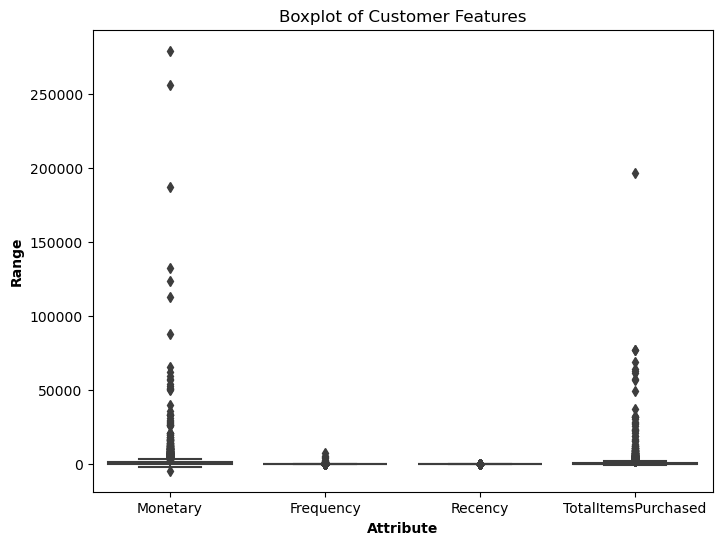

In [14]:
# visualisation of outlier of Monetary, Frequency, Recency and TotalItemPurchaed using boxplot
attribute=['Monetary','Frequency','Recency','TotalItemsPurchased']
plt.rcParams['figure.figsize']=[8,6]
sns.boxplot(data=customer_features[attribute], orient='v', palette='Paired', saturation=0.75,whis=1.5,  width=0.8)
plt.title('Boxplot of Customer Features')
plt.xlabel('Attribute', fontweight='bold')
plt.ylabel('Range', fontweight='bold')
plt.show()

In [15]:
# Removing outlier for Monetary
Q1=customer_features.Monetary.quantile(0.25)
Q3=customer_features.Monetary.quantile(0.75)
IQR=Q3-Q1
customer_features=customer_features[(customer_features.Monetary>=Q1-1.5*IQR) & (customer_features.Monetary<=Q3+1.5*IQR)]
# Removing outlier for Frequency
Q1=customer_features.Frequency.quantile(0.25)
Q3=customer_features.Frequency.quantile(0.75)
IQR=Q3-Q1
customer_features=customer_features[(customer_features.Frequency>=Q1-1.5*IQR) & (customer_features.Frequency<=Q3+1.5*IQR)]
# Removing outlier for Recency
Q1=customer_features.Recency.quantile(0.25)
Q3=customer_features.Recency.quantile(0.75)
IQR=Q3-Q1
customer_features=customer_features[(customer_features.Recency>=Q1-1.5*IQR) & (customer_features.Recency<=Q3+1.5*IQR)]
# Removing outlier for Quantity
Q1=customer_features.TotalItemsPurchased.quantile(0.25)
Q3=customer_features.TotalItemsPurchased.quantile(0.75)
IQR=Q3-Q1
customer_features=customer_features[(customer_features.TotalItemsPurchased>=Q1-1.5*IQR) & (customer_features.TotalItemsPurchased<=Q3+1.5*IQR)]


In [16]:
customer_features_df=customer_features[['Monetary','Frequency','Recency','TotalItemsPurchased']]
# Instantiate
scaling=StandardScaler()
# fit the dataframe
customer_features_df=scaling.fit_transform(customer_features_df)
customer_features_df.shape

(3430, 4)

### Ebow method to determine the number of cluster.

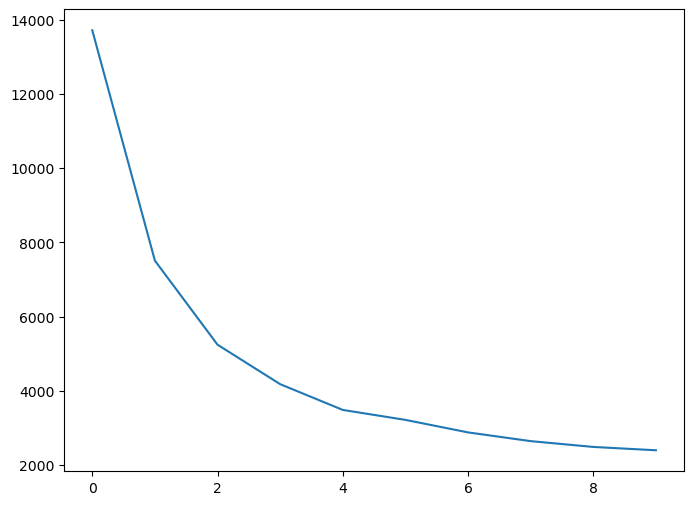

In [17]:
sse = []
k_values = range(1, 11)  # Testing k from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(customer_features_df)
    sse.append(kmeans.inertia_)
plt.plot(sse)

In [18]:
# model the fetaures with KMeans using cluster=3
kmeans=KMeans(n_clusters=4, max_iter=200, n_init='auto')
kmeans.fit(customer_features_df)

KMeans(max_iter=200, n_clusters=4)

In [19]:
kmeans.labels_

array([2, 1, 2, ..., 2, 2, 0])

In [20]:
# assigning the labels
customer_features['cluster_id']=kmeans.predict(customer_features_df)
customer_features.head()


,CustomerID,Monetary,Frequency,Recency,TotalItemsPurchased,cluster_id
0,12346.0,0.00,2,325,0,2
3,12349.0,1757.55,73,18,631,1
4,12350.0,334.40,17,309,197,2
5,12352.0,1545.41,95,35,470,3
6,12353.0,89.00,4,203,20,2


In [21]:
customer_features.tail()

,CustomerID,Monetary,Frequency,Recency,TotalItemsPurchased,cluster_id
4365,18277.0,97.63,9,57,67,0
4366,18278.0,173.90,9,73,66,0
4367,18280.0,180.60,10,277,45,2
4368,18281.0,80.82,7,180,54,2
4369,18282.0,176.60,13,7,98,0


# Cluster analysis and Visualisation

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cluster_id', ylabel='Monetary'>

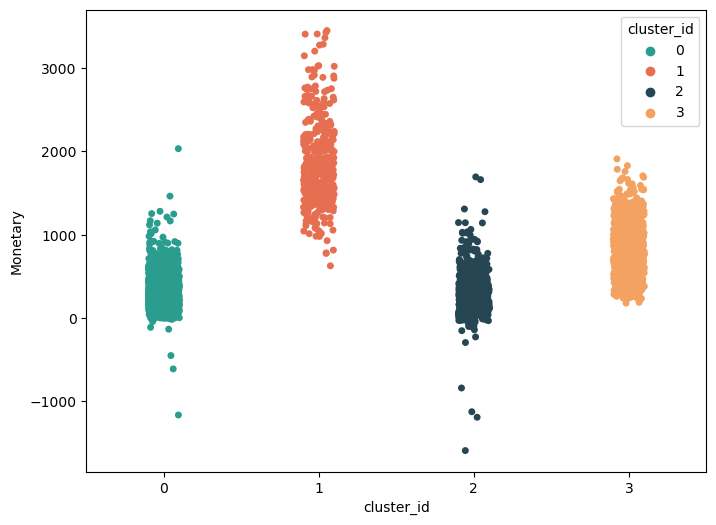

In [22]:
# stripplot of Cluster_id vs Monetary

custom_palette=['#2a9d8f', '#e76f51', '#264653', '#f4a261']
sns.stripplot(x='cluster_id',y="Monetary", palette=custom_palette,data=customer_features,hue='cluster_id')


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cluster_id', ylabel='Frequency'>

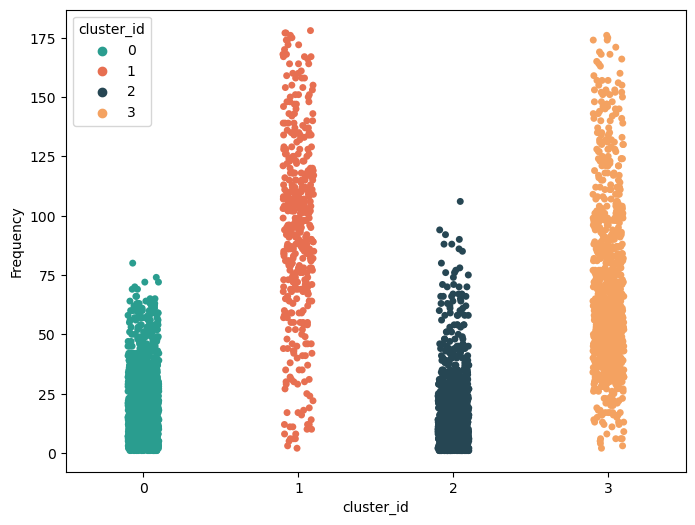

In [23]:
# stripplot of Cluster_id vs Frequency
sns.stripplot(x='cluster_id',y="Frequency", palette=custom_palette,data=customer_features,hue='cluster_id')

### Cluster 0 and 2 exhibit higher frequencies which means the customers from these clusters purchased items more frequent than compared to clusters 1 and 3.

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cluster_id', ylabel='Recency'>

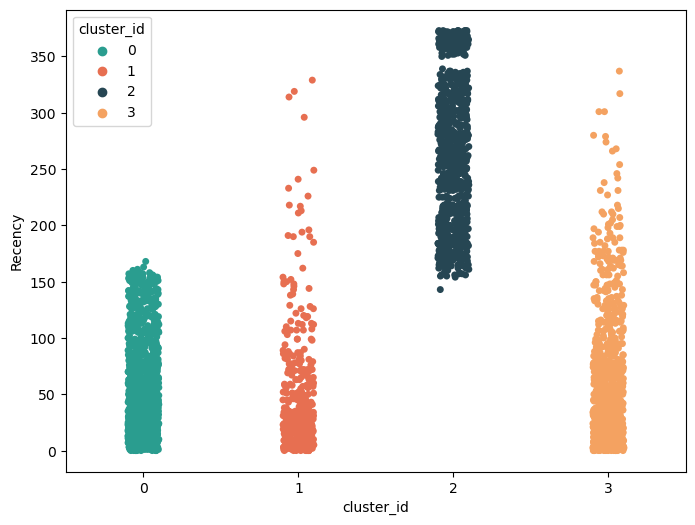

In [24]:
# stripplot of Cluster_id vs Recency
sns.stripplot(x='cluster_id',y="Recency", palette=custom_palette,data=customer_features,hue='cluster_id')

### Cluster 3 shows the highest recency values which indicate that the customer in this group is inactive for long period.Cluster 0 has the lowest recency values indicating that this customer made a recent purchases. Cluster 1 and 2 are intermediate.


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cluster_id', ylabel='TotalItemsPurchased'>

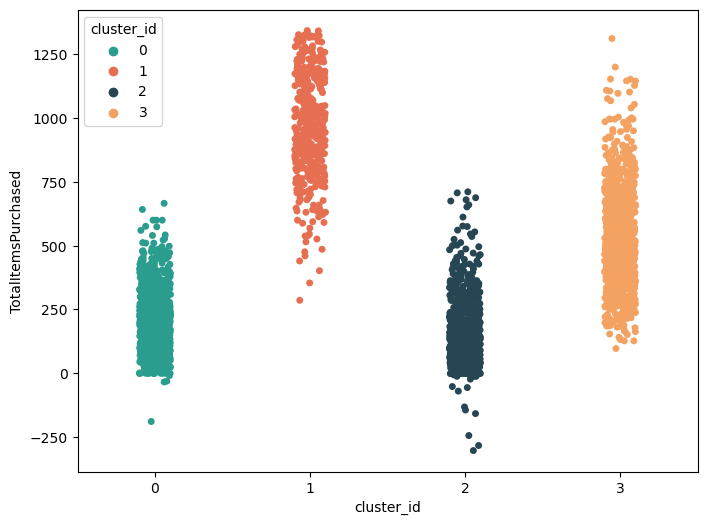

In [25]:
# stripplot of Cluster_id vs Quantity

sns.stripplot(x='cluster_id',y="TotalItemsPurchased", palette=custom_palette,data=customer_features, hue='cluster_id')